In [22]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from tqdm import tqdm_notebook as tqdm

In [25]:
#Get file paths for HWR words
HWR_words_globs = ['/home/rob/HWR/datasets/cvl-database-1-1/trainset/words/*/*.tif',
                  '/home/rob/HWR/datasets/RIMES/trainingsnippets_icdar/training_WR/**/*.tiff',
                  "/home/rob/HWR/datasets/IAM/words/**/*.png",
                  "/home/rob/HWR/datasets/IAMHist/washingtondb-v1.0/washingtondb-v1.0/**/*.*"]

HWR_words_fps = []
for glob_path in HWR_words_globs:
    HWR_words_fps += glob(glob_path)
np.random.choice(HWR_words_fps)

'/home/rob/HWR/datasets/cvl-database-1-1/trainset/words/0022/0022-1-6-6-a.tif'

In [245]:
#Make fake handwritten label
def make_fake_handwritten_label(blank_fp):
    if not os.path.exists(blank_fp):
        return None
    
    faked_fp = blank_fp.replace('Blank','Faked_HWR')
    if os.path.exists(faked_fp):
        return None
    #start position should be somewhat random
    sx_min = 0
    sx_max = 20
    sy_min = 20
    sy_max = 150
    space_y_min = 30
    space_y_max = 100
    space_x_min = 1
    space_x_max = 90
    word_height_min = 100
    word_height_max = 200
    space_left_on_label = True

    sx = np.random.randint(sx_min, sx_max)
    sy = np.random.randint(sy_min, sy_max)

    space_y = np.random.randint(space_y_min, space_y_max)

    blank = cv2.imread(blank_fp)
    faked = blank.copy()
    gray = cv2.cvtColor(blank, cv2.COLOR_BGR2GRAY)
    word_fp = np.random.choice(HWR_words_fps)
    word = cv2.imread(word_fp)
    word_height = np.random.randint(word_height_min,word_height_max)
    word_scale = word_height/word.shape[0]
    word = cv2.resize(word, (int(word.shape[1]*word_scale),int(word.shape[0]*word_scale)))
    ex = sx + word.shape[0]
    ey = sy + word.shape[1]

    while ey >= faked.shape[1]:
        word_fp = np.random.choice(HWR_words_fps)
        word = cv2.imread(word_fp)
        word_height = np.random.randint(word_height_min,word_height_max)
        word_scale = word_height/word.shape[0]
        word = cv2.resize(word, (int(word.shape[1]*word_scale),int(word.shape[0]*word_scale)))
        ex = sx + word.shape[0]
        ey = sy + word.shape[1]
    
    
    while space_left_on_label:
        
            
        for j in range(word.shape[1]):
            y = sy + j
            for i in range(word.shape[0]):
                x = sx + i
                value = gray[x,y]*((255-word[i,j])/255)
                channels = faked[x,y] - value
                channels[0] = max(channels[0],0)
                channels[1] = max(channels[1],0)
                channels[2] = max(channels[2],0)
                faked[x,y] = channels


        word_fp = np.random.choice(HWR_words_fps)
        word = cv2.imread(word_fp)
        #if word is too small, ie is a period or comma, skip it.
        word_height = np.random.randint(word_height_min,word_height_max)
        word_scale = word_height/word.shape[0]
        word = cv2.resize(word, (int(word.shape[1]*word_scale),int(word.shape[0]*word_scale)))


        space_y = np.random.randint(space_y_min, space_y_max)

        sx = ex - word.shape[0]
        sy = ey + space_y

        ey = sy + word.shape[1]
        #check if word is too wide to fit on label
        if ey > faked.shape[1]:
            #move to new line
            space_x = np.random.randint(space_x_min, space_x_max)
            sx = ex + space_x
            sy = np.random.randint(sy_min, sy_max)
            ex = sx + word.shape[0]
            ey = sy + word.shape[1]

            if ey > faked.shape[1]:
                break

        if ex > faked.shape[0]:
            break
            
    cv2.imwrite(faked_fp,faked)
    
        
    #space_left_on_label = False

In [144]:
blank_fp

'/home/rob/HWR/datasets/zooniverse/221196/Blank0021.jpg'

In [246]:
types = ['Handwritten','Machine-written','Mixed']

df = pd.read_csv('box coords.csv', index_col=0)
df = df.sample(frac=1)
df.head()
failed = 0
for name,row in tqdm(df.iterrows(), total=len(df)):
    orig_fp = row['orig_fp']
    orig = cv2.imread(orig_fp)
    
    blank_fp = row['orig_fp'].replace('Label','Blank')
    
    fake_label_type = np.random.choice(types)
    try:
        make_fake_handwritten_label(blank_fp)
    except:
        failed+=1
        print(failed)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [153]:
blank_fp

'/home/rob/HWR/datasets/zooniverse/222972/Blank0021.jpg'

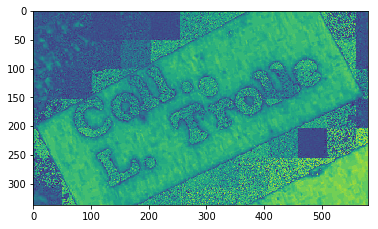

In [225]:
plt.imshow(gray)

In [232]:
gray.shape,x,y, ey, faked.shape[1]

((374, 408), 17, 408, 478, 408)

In [235]:
ey

478

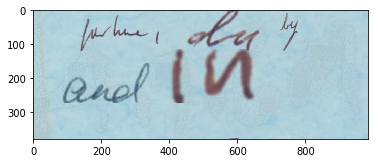

In [242]:
plt.imshow(faked)